In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

In [2]:
start = datetime(2014, 1, 1)
end = datetime(2020, 11, 17)
acoes = ['PETR4.SA', 'VALE3.SA', 'UNIP6.SA', 'FESA4.SA', 'BPAN4.SA', 'ITUB4.SA']
dados = web.get_data_yahoo(acoes, start, end)['Adj Close']

In [3]:
dados.describe()

Symbols,PETR4.SA,VALE3.SA,UNIP6.SA,FESA4.SA,BPAN4.SA,ITUB4.SA
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,16.425516,31.795510,13.220403,11.902374,3.403072,22.063047
std,6.589559,14.995963,12.667148,6.299885,2.838711,7.810488
min,3.896351,7.356941,1.395404,3.834153,1.126317,10.377032
25%,11.886189,17.676281,1.853272,5.669804,1.608441,14.485069
50%,14.949927,26.791176,4.360893,9.224921,1.849036,22.035367
75%,21.489573,46.085945,27.782187,18.165567,3.492959,28.660682
max,30.807720,66.970001,39.553616,25.429783,11.852301,37.184467


In [4]:
calculo do retorno anual
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

retorno_anual

Symbols
PETR4.SA    0.217957
VALE3.SA    0.251227
UNIP6.SA    0.516905
FESA4.SA    0.189801
BPAN4.SA    0.275900
ITUB4.SA    0.198417
dtype: float64

In [5]:
#calculo da covariancia anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

cov_anual

Symbols,PETR4.SA,VALE3.SA,UNIP6.SA,FESA4.SA,BPAN4.SA,ITUB4.SA
Symbols,,,,,,
PETR4.SA,0.290002,0.126080,0.063024,0.063600,0.097168,0.113874
VALE3.SA,0.126080,0.230353,0.047785,0.058424,0.058997,0.059455
UNIP6.SA,0.063024,0.047785,0.181019,0.040576,0.052515,0.034873
FESA4.SA,0.063600,0.058424,0.040576,0.151090,0.043070,0.036962
BPAN4.SA,0.097168,0.058997,0.052515,0.043070,0.319812,0.065277
ITUB4.SA,0.113874,0.059455,0.034873,0.036962,0.065277,0.112854


In [6]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

In [7]:
numero_acoes = len(acoes)
numero_carteiras = 100000

In [8]:
# vamos usar uma simulação aleatória
np.random.seed(101)

In [9]:
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

In [10]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

In [11]:
for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

In [12]:
df = pd.DataFrame(carteira)

In [13]:
# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

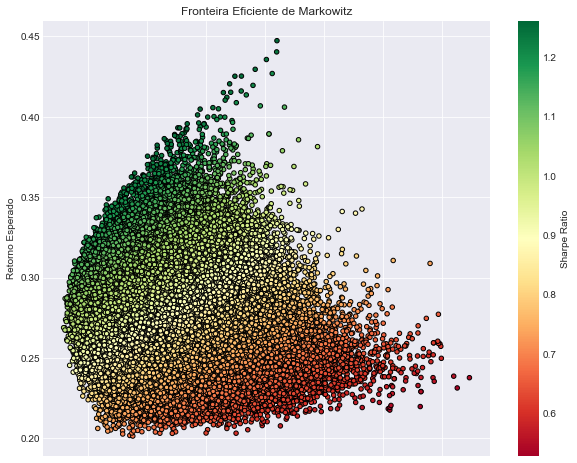

In [14]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [16]:

# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()